# Programming for Data Analysis Project
### Data Set Simulation: Healthy Ireland Survey 2019

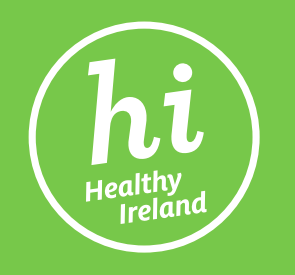 

### Submission Date : 03/01/2022

#### Introduction

The aim of this project is to simulate data using Python that mirrors a real-world phenomenon. The following Python modules are used to simulate and investigate the dataset and the relationships between its dependent and independent variables:
- NumPy Random
- SciPy Stats
- Pandas
- Matplotlib Pyplot/Seaborn

The phenomenon I've chosen is the general health of the Irish population, and the simulation is based largely on the results of the 2019 Healthy Ireland survey. This is an annual, interviewer-administered, face to face study commissioned by the Department of Health, and is part of the Healthy Ireland framework to improve the health and wellbeing of people living in Ireland. 

Its main objectives are: 
- To provide current and credible data to monitor the efficacy of other Healthy Ireland framework initiatives 
- To ensure Ireland meets its international reporting requiremnts
- Support the Department of Health in policy prioritization and awareness-raising initiatives

The survey covers a wide range of topics including physical measurements, alcohol and tobacco consumption, general health, sleep quality and physical activity levels. 

I chose this survey as the basis for the simulated dataset as my undergraduate degree was in Nutritional Science, with a strong emphasis on public health. Although I no longer work in this area, I have maintained a strong interest in it.

The simulation has three main components:
- Demographic Factors (independent variables) - age, gender, employment and socioeconomic status
- Health Outcomes  (dependent variables) - BMI, physical activity levels, alcohol consumption, smoking status, hours sleep. 
- Relationship between independent and dependent Variables, based on figures reported in the Healthy Ireland survey

In summary, this project will simulate the data provided by the Healthy Ireland survey respondents, and recreate the relationships between demographic factors and reported health outcomes.

#### Part 1: Simulating Independent Variables

##### Survey Respondents 

The Healthy Ireland survey is administered annually to a representative sample of the Irish population. Approximately 7500 people aged 15 or over participated in 2019. 

Participating households are selected using a multistage sampling process that results in all households in Ireland having an equal chance of selection. Households were divided into equal-sized quintiles based on deprivation index, with the first quintile representing the most deprived area and the fifth quintile representing the most affluent area.  

From each of the randomly selected households, one member aged 15 or older is chosen to participate. Survey respondents are weighted to ensure the sample is representative of the Irish population in terms of age group, sex and region.

Therefore, the first task in this simulation is to generate a respondent sample that mirrors the survey design and Irish population. As regional differences in health outcomes did not feature significantly in the Healthy Ireland report, this variable was excluded. The main demographic variablees of interest were gender, age, employment and deprivation index. 

The three independent variables in this dataset are gender, age and deprivation index as these are not related to any other variables. Therefore, these are generated first to simulate the dataset.

##### 1. Gender

First, the proportion of females to males was calculated, as the female population of Ireland is slightly higer than the male.

The gender breakdown of participants wasn't included in the Healthy Ireland survey, so this was extrapolated from 2016 census data.

The below code reads a CSV file downloaded from the CSO website containing the 2016 population figures by gender and regional authority. It filters on the state-level figures for males and females and calculates the percentage for each of these. 

In [10]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm
from scipy.stats import gamma
from scipy.stats import expon

total_pop = pd.read_csv('Population by Gender 2016.csv')
total_pop = total_pop.rename(columns = {"VALUE": "Population"})
whole_country = total_pop.loc[total_pop['Regional Authority'] == 'State']
male_pop = whole_country.loc[whole_country["Sex"] == "Male"]
female_pop = whole_country.loc[whole_country["Sex"] == "Female"]
percentage_females = female_pop["Population"].values/(female_pop["Population"].values + male_pop["Population"].values) * 100
percentage_males = 100 - percentage_females
print("\n")
print("Total percentage of female Irish population : {}".format(percentage_females))
print("Total percentage of male Irish population  : {}".format(percentage_males))
print("\n")



Total percentage of female Irish population : [50.55659915]
Total percentage of male Irish population  : [49.44340085]




Once the relative proportions for both genders were established, the next step was to generate corresponding data. The below code uses the np.random.choice() function to generate an array with 7500 elements. Each element is assigned a value of "male" or "female" and the probability of assignment for each is based on the population breakdown from the previous section. 

[['Female' '3861']
 ['Male' '3639']]




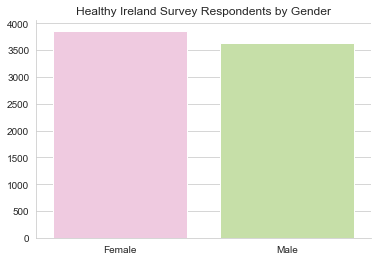

In [11]:
#Generate male/female data points based on probab
genders = ["Female", "Male"]
gender = np.random.choice(a = genders, size = 7500, p = [0.51, 0.49])
unique, counts = np.unique(gender, return_counts = True)
print (np.asarray((unique, counts)).T)
print("\n")

#Barplot showing male/female breakdown
sns.barplot(x = unique, y = counts, palette="PiYG")
plt.title("Healthy Ireland Survey Respondents by Gender")
sns.despine()
plt.show()
plt.close()

As the above output shows, the proportions of male and female respondents are roughly equivalent to the overall population distribution. 

##### 2. Age

As was the case for gender, the exact age breakdown of the survey participants was not provided in the Healthy Ireland report. The age distribution was estimated based on 2016 census data.

According to the census, the median age of the Irish population is 37.48. On the CSO website, there is a pyramind showing a breakdown of the Irish population by age.

[Link to CSO figure]("https://www.cso.ie/en/releasesandpublications/ep/p-cp3oy/cp3/assr/")

This figure appears to have two peaks, one at the age of about 7 and another at about 37.

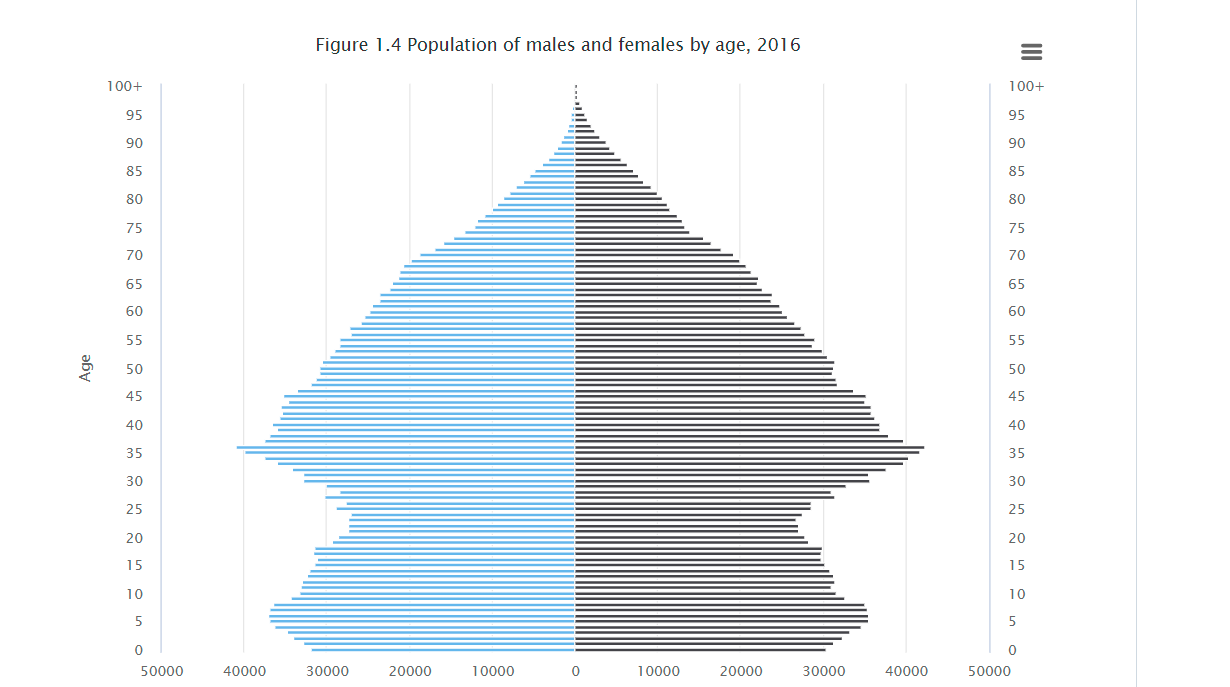

As we are only concered with individuals aged 15 and over for this simulation, a truncated normal distribution was chosen to model the age profile of the respondents. This is a variation of the normal distribution where the domain (x values) are restricted to a certain range. This distribution takes four parameters:
 - Mean
 - Standard deviation
 - Upper bound value
 - Lower bound value
 
Applying the truncated normal distribution to the age variable allows us to set an upper limit of 100 and a lower limit of 15, while maintaining the peak at 37 seen in the CSO figure. 

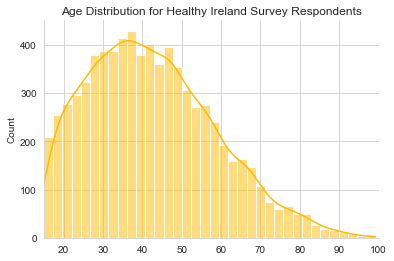

In [12]:
from scipy.stats import truncnorm

#Mean, standard devation and upper and lower limits
#20 was chosen as the standard deviation to replicate the variation seen in the CSO population pyramid
my_mean = 37.4
my_std = 20
myclip_a = 15
myclip_b = 100

#From the scipy stats docs - a and b are shape parameters for the truncnorm distribution
#The below formula can be used to obtain shape parameters for a and b with a given mean, std and upper and lower bound values
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
age_dist = truncnorm.rvs(a,b, loc = 37.4, scale = 20, size = 7500)

fig, ax = plt.subplots()
sns.histplot(age_dist, kde = True, color = "#ffbb00", edgecolor = "white")
sns.set_style("darkgrid")
plt.title("Age Distribution for Healthy Ireland Survey Respondents", fontsize = 12)
plt.xlim([15, 100])
sns.despine()
plt.show()
plt.close()


age_group = []
#Dividing ages into categories, as this will help with grouping/plotting later

def age_categories (row) :
    if row["Age"] <= 24:
        age_classification = "15-24"
    elif row["Age"] > 24 and row["Age"] <=34:
        age_classification = "25-34"
    elif row["Age"] > 34 and row["Age"] <=44:
        age_classification = "35-44"
    elif row["Age"] > 44 and row["Age"] <=54:
        age_classification = "45-54"
    elif row["Age"] > 54 and row["Age"] <=64:
        age_classification = "55-64"
    elif row["Age"] > 64 and row["Age"] <=74:
        age_classification = "65-74"
    else:
        age_classification = "75+"

    age_group.append(age_classification)

    return(age_classification)

The resulting distribution appears relatively close to that of the original CSO figure, peaking at approximately 37 and gradually tapering off with increased age.

##### 3. Socioeconomic Status

As mentioned earlier in the notebook, survey participants were divided into five quintiles of equal size based on their level of affluence/deprivation. This assignment was based on the Pobal Haase-Pratschke Deprivation Index, which is a series of maps showing the affluence or disadvantage of a particular area, using data compiled from various censuses. The measurements of affluence/deprivation are based on various indicators, such as the proportion of skilled professionals, education and employment levels, and single-parent households found within an area.

[More Info on Pobal Deprivation Profiling](https://maps.pobal.ie)

The below code uses the np.random.choice() function to create an array of 7500 elements, and assign each element a Deprivation Index value. There are five possible values, and all have an equal probability of assignment.

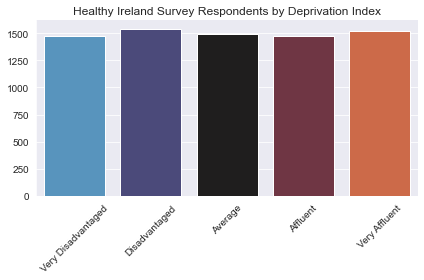

In [13]:
#For this survey - participants were divided into quintiles based on affluence/poverty level
#Equal chance that particpant would be in any of these categories

#List of quintiles that can be assigned to participants
quintiles = ["Very Disadvantaged", "Disadvantaged", "Average", "Affluent", "Very Affluent"]

affluence_levels = np.random.choice(quintiles, 7500, p = [0.2, 0.2, 0.2, 0.2, 0.2])

unique, counts = np.unique(affluence_levels, return_counts = True)
sns.barplot(x = unique, y = counts, palette = "icefire", order = quintiles)

#Plotting elements to check whether proportions are equal
plt.xticks(rotation = 45)
plt.title("Healthy Ireland Survey Respondents by Deprivation Index", fontsize = 12)
plt.tight_layout()
sns.despine()
plt.show()
plt.close()

As seen in the above plot, the proportion of respondents in each quntile is approximately equal.

#### Creating the Dataset

As all other variables in the dataset, such as employment status and health indicators, are dependent on attributes of the individual participants, the three independent variables must now be combined into a Pandas dataframe.

The below code creates the dataframe with three columns for age, gender and deprivation index, using the data already generated for these variables. The dataset is written to a csv file to check the results, and the first five rows are printed.

In [14]:
demographic_dataset = pd.DataFrame({"Gender": gender, "Age": age_dist, "Socioeconomic Status": affluence_levels})
demographic_dataset.to_csv("dataset.csv")

demographic_dataset["Age Category"] = demographic_dataset.apply(age_categories, axis = 1)
age_order = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"]

print(demographic_dataset.head(n = 5))

   Gender        Age Socioeconomic Status Age Category
0  Female  64.008566        Disadvantaged        65-74
1  Female  78.599277              Average          75+
2    Male  51.169643              Average        45-54
3    Male  32.352845        Very Affluent        25-34
4  Female  17.574237             Affluent        15-24


#### Part 2: Simulating Dependent Variables

Dependent variables are those that are influenced by other variables within a dataset. For this simulation, the dependent variables are as follows:
- Employment Status (dependent on gender and age)
- BMI (dependent on age and deprivation index)
- Physical Activity Levels (dependent on BMI and age)
- Alcohol Consumption (dependent on gender and deprivation index)
- Hours Sleep (dependent on age and employment status)

##### Employment Status

Employment status was simulated based on figures from the most recent Labour Force Quarterly Survey. This is a nationwide survey of households designed to provide an accurate accurate measurement of employment and unemployment in Ireland. 

The survey provides estimates for the following: 
- Persons in Employment
- Numbers Unemployed
- Labour Force Participation Rates
- Inactive Population (not in Labour Force)

[Link to Q3 2021 Labour Force Survey](https://data.cso.ie/table/QLF18)

The table linked above provides a percentage breakdown by gender and age of those in employment, unemployed or not active in the labour force.

Reasons for inactivity in the Labour Force include the following:
- Caring/Family Reasons
- In Education or Training
- Illness/Disability
- Retired
- Other reasons

According to the LFS figures:
- Those aged under 20 and over 65 have the highest proportion of individuals not in the labour force.
- Those aged between 25 and 55 have the highest proportion of employed persons.
- After the age of 55, the proportion of active participants in the labour force begins to decrease.
- The proportion of women in the labour force is lower than that of men.

The below code assigns one of three employment options to each participant in the survey (employed, unemployed, not in labour force). The probability of each being selected is influenced by gender and age. The probability assignment is based on the percentage breakdowns stated in the LFS figures. 

In [17]:
employment_choices = ["Employed", "Unemployed", "Not in Labour Force"]

def in_employment (row):
    if row["Gender"] == "Male":
        if row["Age"] <20:
            return np.random.choice(a = employment_choices, p =[0.33, 0.12, 0.55])
        elif row["Age"] >= 20 and row["Age"] < 25:
            return np.random.choice(a = employment_choices, p =[0.68, 0.12, 0.20])
        elif row["Age"] >= 25  and row["Age"] < 35:
            return np.random.choice(a = employment_choices, p =[0.84, 0.07, 0.09])
        elif row["Age"] >= 35  and row["Age"] < 45:
            return np.random.choice(a = employment_choices, p =[0.9, 0.03, 0.07])
        elif row["Age"] >= 45  and row["Age"] < 55:
            return np.random.choice(a = employment_choices, p =[0.85, 0.04, 0.11])
        elif row["Age"] >= 55  and row["Age"] < 59:
            return np.random.choice(a = employment_choices, p =[0.79, 0.04, 0.17])
        elif row["Age"] >= 59  and row["Age"] < 64:
            return np.random.choice(a = employment_choices, p =[0.58, 0.04, 0.38])
        elif row["Age"] >= 65  and row["Age"] < 69:
            return np.random.choice(a = employment_choices, p =[0.1, 0.01, 0.89])
        else:
            return np.random.choice(a = employment_choices, p =[0, 0.06, 0.94])
    else:
        if row["Age"] <20:
            return np.random.choice(a = employment_choices, p =[0.33, 0.16, 0.51])
        elif row["Age"] >= 20 and row["Age"] < 25:
            return np.random.choice(a = employment_choices, p =[0.68, 0.09, 0.23])
        elif row["Age"] >= 25  and row["Age"] < 35:
            return np.random.choice(a = employment_choices, p =[0.77, 0.05, 0.18])
        elif row["Age"] >= 35  and row["Age"] < 45:
            return np.random.choice(a = employment_choices, p =[0.77, 0.05, 0.18])
        elif row["Age"] >= 45  and row["Age"] < 55:
            return np.random.choice(a = employment_choices, p =[0.74, 0.04, 0.22])
        elif row["Age"] >= 55  and row["Age"] < 59:
            return np.random.choice(a = employment_choices, p =[0.67, 0.04, 0.29])
        elif row["Age"] >= 59  and row["Age"] < 64:
            return np.random.choice(a = employment_choices, p =[0.46, 0.05, 0.49])
        elif row["Age"] >= 65  and row["Age"] < 69:
            return np.random.choice(a = employment_choices, p =[0.1, 0.01, 0.89])
        else:
            return np.random.choice(a = employment_choices, p =[0.01, 0.05, 0.94])
        
males = demographic_dataset.loc[demographic_dataset["Gender"] == "Male"]
females = demographic_dataset.loc[demographic_dataset["Gender"] == "Female"]

The Seaborn countplot function is then used to check the proportions of participants in each of the three employment categories, broken down by age and gender. 

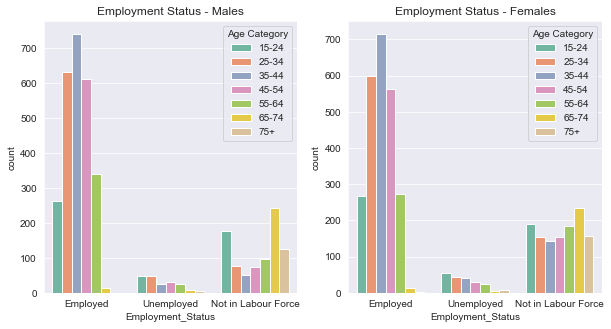

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,5))
demographic_dataset["Employment_Status"] = demographic_dataset.apply(in_employment, axis = 1)

sns.countplot(ax = ax1, x = "Employment_Status", hue = "Age Category", data = males, hue_order= age_order, order = employment_choices, palette = "Set2")
sns.countplot(ax = ax2, x = "Employment_Status", hue = "Age Category", data = females, hue_order= age_order, order = employment_choices, palette = "Set2")
sns.set_style("whitegrid")
ax1.set_title("Employment Status - Males")
ax2.set_title("Employment Status - Females")
plt.show()
plt.close()

As the resulting plots show, the proportion of males in employment is slightly higher than females, and the proportion of particpants not in the labour force is higher for the oldest and youngest age categories. The proportion of participants in employment is highest in the 25-44 age brackets, and begins to decrease after this point. 

##### BMI

BMI (Body Mass Index) is an estimation of body fat based on height and weight. is calculated by dividing a person's weight in kilograms by height in metres squared (kg/m2). The results are categorized as follows:
- <18.5 : Underweight
- 18.5 - 24.99: Healthy weight
- 25 - 30 : Overweight
- 30 + Obese

Excess weight is linked to a number of negative health outcomes. According to the CDC, overweight and obese individuals are at an increased risk of the following:
- All causes of death (mortality)
- Hypertension
- Increased cholesterol
- Type 2 diabetes
- Osteoarthritis
- Several types of cancer

Obesity is also linked to the onset of metabolic syndrome, which is a cluster of conditions that occur together, increasing the risk of heart disease, stroke and type 2 diabetes. 

Overweight and obesity have become a significant global health concern over the past four decades. Between 1975 and 2016, the worldwide prevalence of obesity nearly tripled between 1975 and 2016. According to the WHO, approximately 40% of adults worldwide are now overweight or obese. In the case of wealthier countries, such as Ireland, this proprtion can be even higher.

The Healthy Ireland survey for 2019 survey reported the following in relation to BMI:
- 37% of respondents overall were overweight and 23% were obese
- The proportion of individuals who are at a healthy weight declines with age, while the proportion of overweight/obese respondents increased
- Older men are more likely to be overweight or obese than women
- Young people living in disadvantaged areas are more likely to be overweight/obese than those in more affluent areas. 

##### BMI Distribution

The distribution for BMI is not likely to be normal, as the proportion of underweight individuals is generally the smallest. This is the case for the Healthy Ireland survey, as just 2% of the sample were underweight.

Therefore, a skewed distribution, where one tail is heavier than the other, may be appropriate. A right-skewed, or positive skew distribution, is a probability distribution with a long right tail, and the mean is to the right of the peak. 

As more respondents in the sample are overweight and obese than normal weight, and this increases with age, the Scipy stats skewnorm distribution could be used, and the skew parameter could be increased with age to move more of the distribution towards the right.  

The below function acts on each row in the dataframe, and depending on the age of the participant, will return a skewnorm variable with adjusted mean and skew parameters. Additionally, the mean parameter is increased for older men and younger people from disadvantaged areas. 

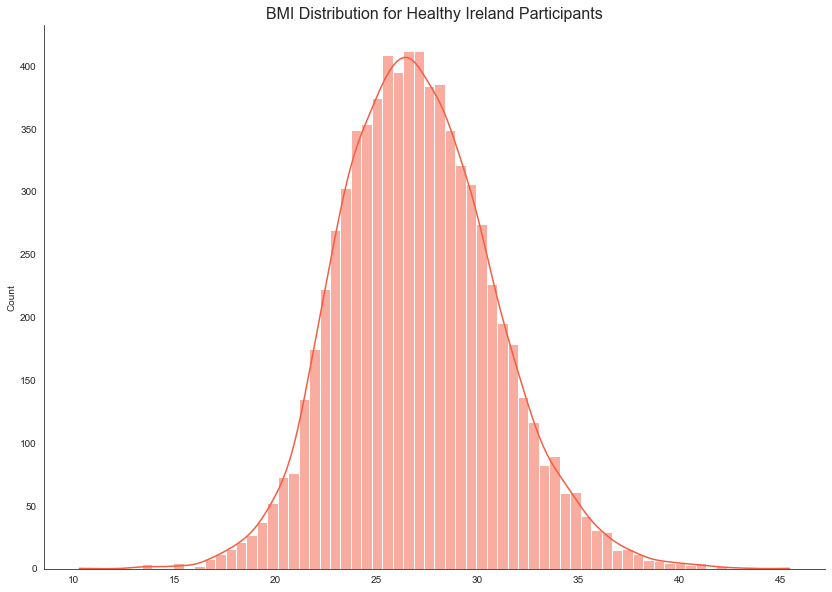

In [79]:
#Setting conditions for BMI assignment
#Std is set to 5 because generally BMI values are in a relatively narrow range (16 - 45)
#For participants that are under 35 and from disadvantaged backgrounds the mean BMI is higher
#For older men, mean BMI is higher than for women of same age

def bmi_assign (row):
    if row ["Gender"] == "Male":
        if row["Age"] <= 24:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)
            else:
                return skewnorm.rvs(a = 1, loc = 20, scale = 5, size = 1)
        elif row["Age"] > 24 and row["Age"] <= 34:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)
            else:
                return skewnorm.rvs(a = 2, loc = 22, scale = 3, size = 1)
        elif row["Age"] > 34 and row["Age"] <= 44:
            return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 44 and row["Age"] <= 54:
            return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 54 and row["Age"] <= 64:
            return skewnorm.rvs(a = 3, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 64 and row["Age"] <= 74:
            return skewnorm.rvs(a = 3, loc = 26, scale = 5, size = 1)
        else:
            return skewnorm.rvs(a = 3, loc = 26.5, scale = 5, size = 1)
    else:
        if row["Age"] <= 24:
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
            else:
                    return skewnorm.rvs(a = 2, loc = 20, scale = 5, size = 1)
        elif row["Age"] > 24 and row["Age"] <= 34: 
            if row["Socioeconomic Status"] == ("Disadvantaged") or row["Socioeconomic Status"] == ("Very Disadvantaged"):
                return skewnorm.rvs(a = 2, loc = 26, scale = 3, size = 1)
            else:
                return skewnorm.rvs(a =2, loc = 22, scale = 3, size = 1)
        elif row["Age"] > 34 and row["Age"] <= 44:
                return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 44 and row["Age"] <= 54:
                return skewnorm.rvs(a = 2, loc = 23, scale = 5, size = 1)
        elif row["Age"] > 54 and row["Age"] <= 64:
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        elif row["Age"] > 64 and row["Age"] <= 74:
                return skewnorm.rvs(a = 2, loc = 25, scale = 5, size = 1)
        else:
                return skewnorm.rvs(a = 2, loc = 26, scale = 5, size = 1)

demographic_dataset["BMI"] = demographic_dataset.apply(bmi_assign, axis = 1)
demographic_dataset.to_csv("dataset.csv")

bmi_values = []
bmi_classification = []
for value in demographic_dataset["BMI"].values:
    bmi_values.append(value.item())
    if value.item() < 18.5:
        classification = "Underweight"
    elif value.item() >= 18.5 and value.item () < 25:
        classification = "Healthy Weight"
    elif value.item() >= 25 and value.item () < 30:
        classification = "Overweight"
    else:
        classification = "Obese"
    bmi_classification.append(classification)

demographic_dataset["BMI"] = bmi_values
demographic_dataset["BMI Classification"] = bmi_classification

demographic_dataset.to_csv("dataset.csv")

fig, ax = plt.subplots(figsize = (14, 10))
sns.set_style ("white")
sns.histplot(ax = ax, data = bmi_values, kde = True, color = "#f55d42")
ax.set_title("BMI Distribution for Healthy Ireland Participants", fontsize = 16)
sns.despine ()
plt.show()
plt.close()


The above distribution is skewed slightly to the right, reflecting that the majority of survey participants were in the overweight and obese categories. The peak is at about 26, which is logical as the majority of participants in the older categories were overweight.

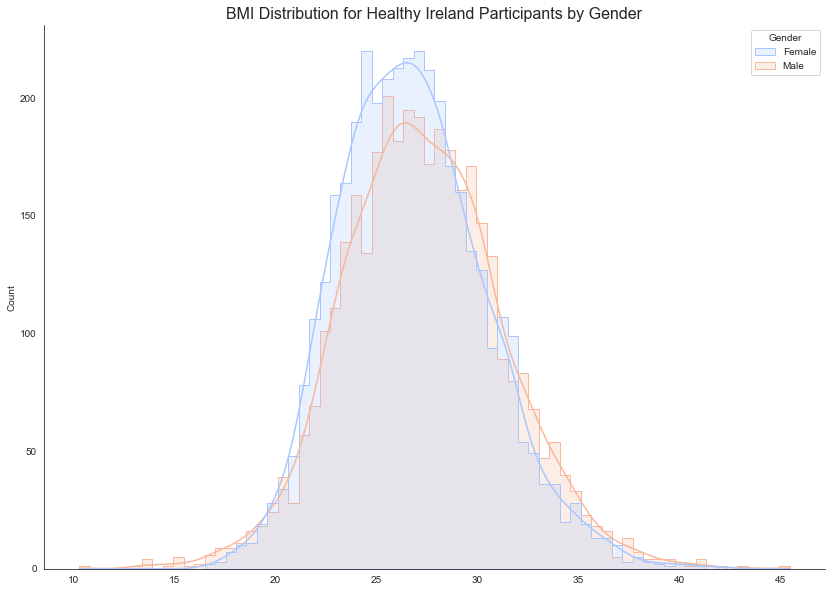

In [81]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.set_style ("white")
sns.histplot(ax = ax, data = demographic_dataset, x = bmi_values, kde = True, color = "#f55d42", hue = "Gender", element = "step", palette = "coolwarm")
ax.set_title("BMI Distribution for Healthy Ireland Participants by Gender", fontsize = 16)
sns.despine ()
plt.show()
plt.close()

The above distribution shows the BMI for each gender. As we can see, the distribution for the male cohort is skewed further to the right than the female, as men are more likely than women to be overweight/obese, particularly the older demographics. 

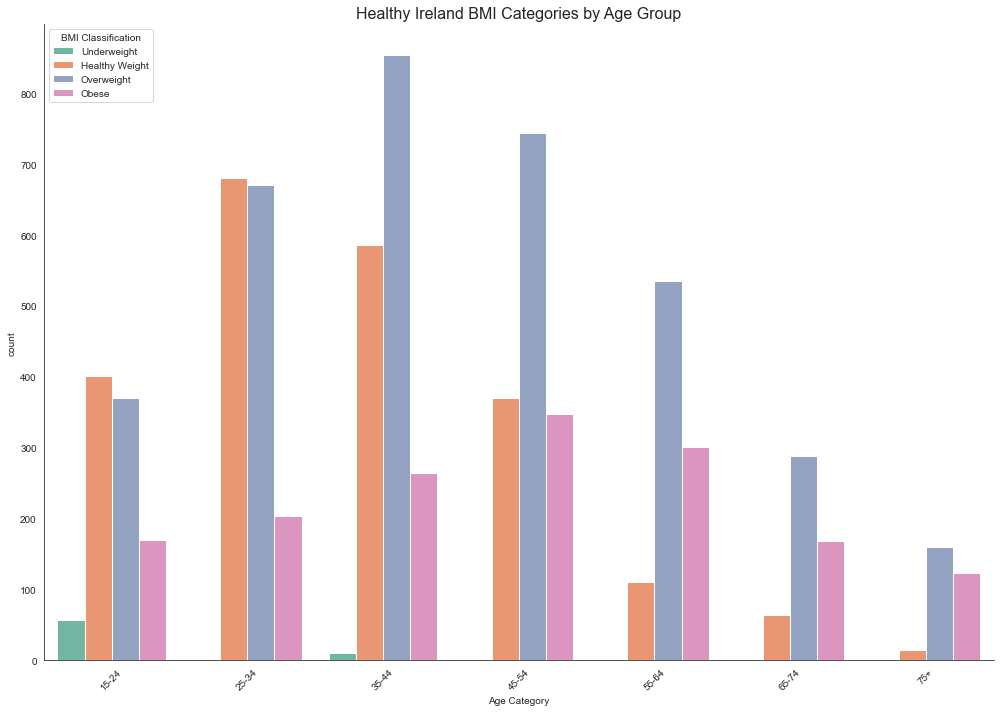

In [82]:
bmi_order = ["Underweight", "Healthy Weight", "Overweight", "Obese"]
fig, ax = plt.subplots(figsize = (14, 10))
sns.countplot(x = "Age Category", hue = "BMI Classification", order = age_order, hue_order=bmi_order, data = demographic_dataset, palette = "Set2")
ax.set_title("Healthy Ireland BMI Categories by Age Group", fontsize = 16)
sns.despine()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
plt.close()

Above is a plot showing the total participants in each BMI category (underweight, healthy, overweight, obese). We can see that as the age profile of the participants increases, so does the proportion of overweight and obese individuls.

The under-35 cohort has the highest proportion of healthy-weight individuals, although a considerable proportion are overweight/obese, which is likely influenced to some extent by the participants from disadvantaged areas. 